### 20 Newsgroups Dataset
http://qwone.com/~jason/20Newsgroups/

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different news group

20news-19997.tar.gz - Original 20 Newsgroups data set

20news-bydate.tar.gz - 20 Newsgroups sorted by date; duplicates and some headers removed (18846 documents)

20news-18828.tar.gz - 20 Newsgroups; duplicates removed, only "From" and "Subject" headers (18828 documents)

In [22]:
import os
import re
import numpy as np
import pandas as pd
import tensorflow as tf


In [23]:

def preprocess_text(text):
    
    # Applies preprocessing on text
    
    #remove leading & end white spaces and convert text to lowercase
    text = text.strip().lower()
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove punctuation marks 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in text:
        if i in punctuations: 
                text = text.replace(i, "")
            
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    
    #remove number
    text = re.sub(r"\d+", "", text)
    
    return text

In [24]:
#Get Data
data_root_path = 'D:\\Users\\chiawei\\konduit\\Github\\newsgroup_data\\20news-bydate\\'
train_folder = '20news-bydate-train'
test_folder = '20news-bydate-test'
file_path = ''

class_label = [f for f in os.listdir(os.path.join(data_root_path, train_folder))]
class_index = [i for i in range(len(class_label))]

total_class = len(class_index)

label_index_pair = {}
for label, index in zip(class_label, class_index):
        label_index_pair[label] = index

print(label_index_pair)

index_label_pair = {}
for index, label in zip(class_index, class_label):
        index_label_pair[index] = label

print('Save index label')
label_path = "labelclass.pickle"
with open(label_path, 'wb') as labelhandler:
    pickle.dump(index_label_pair, labelhandler)



{'alt.atheism': 0, 'comp.graphics': 1, 'comp.os.ms-windows.misc': 2, 'comp.sys.ibm.pc.hardware': 3, 'comp.sys.mac.hardware': 4, 'comp.windows.x': 5, 'misc.forsale': 6, 'rec.autos': 7, 'rec.motorcycles': 8, 'rec.sport.baseball': 9, 'rec.sport.hockey': 10, 'sci.crypt': 11, 'sci.electronics': 12, 'sci.med': 13, 'sci.space': 14, 'soc.religion.christian': 15, 'talk.politics.guns': 16, 'talk.politics.mideast': 17, 'talk.politics.misc': 18, 'talk.religion.misc': 19}
Save index label


In [25]:


def get_dfs(data_path, class_dict):
    
    data = pd.DataFrame(columns = ["text", "classindex", "classlabel"])

    text = []
    class_index = []
    class_label = []
    
    for label in label_index_pair.keys():

        class_path = os.path.join(data_path, label)
        files_list = [f for f in os.listdir(class_path) ]

        for f in os.listdir(class_path):

            with open(os.path.join(class_path, f), "r") as reader:

                text.append(reader.read())#spreprocess_text(reader.read()))
                class_label.append(label)
                class_index.append(class_dict[label])
                
    data["text"] = text
    data["classindex"] = class_index
    data["classlabel"] = class_label
                
    return data

                    
train_data = get_dfs(os.path.join(data_root_path, train_folder), label_index_pair)
test_data = get_dfs(os.path.join(data_root_path, test_folder), label_index_pair)
 

In [26]:
#Shuffle data
train_data = train_data.reindex(np.random.permutation(train_data.index))
test_data = test_data.reindex(np.random.permutation(test_data.index))

print("Number of training data: {}".format(train_data.shape[0]))
print("Number of testing data: {}".format(test_data.shape[0]))

train_data.head(20)
#train_data.to_csv(os.path.join(data_root_path, "train_data.csv"))
#test_data.to_csv(os.path.join(data_root_path, "test_data.csv"))

Number of training data: 11314
Number of testing data: 7532


,text,classindex,classlabel
2945,From: gringort@tantalus.pa.dec.com (Joel Gring...,5,comp.windows.x
8322,From: kjenks@gothamcity.jsc.nasa.gov\nSubject:...,14,sci.space
1558,From: louray@seas.gwu.edu (Michael Panayiotaki...,2,comp.os.ms-windows.misc
3639,From: mkbaird@david.wheaton.edu (marcus k bair...,6,misc.forsale
9435,From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...,16,talk.politics.guns
3211,From: toml@blade.Boulder.ParcPlace.COM (Tom La...,5,comp.windows.x
7346,"From: levy@levy.fnal.gov (Mark E. Levy, ext. 8...",12,sci.electronics
1208,From: mitchell@nodecg.ncc.telecomwa.oz.au (Cli...,2,comp.os.ms-windows.misc
4327,From: dbernard@clesun.Central.Sun.COM (Dave Be...,7,rec.autos
221,From: sandvik@newton.apple.com (Kent Sandvik)\...,0,alt.atheism


In [27]:
# Create tokenizer for the data
MAX_WORDS_PER_SEQUENCE = 8000
MAX_LEN = 256
EMBEDDINGS_SIZE = 200
BATCH_SIZE = 512

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = MAX_WORDS_PER_SEQUENCE, oov_token = "<unk>")
   
tokenizer.fit_on_texts(train_data["text"])

train_sequences = tokenizer.texts_to_sequences(train_data["text"])
test_sequences = tokenizer.texts_to_sequences(test_data["text"])

train_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen = MAX_LEN, padding = "post")
test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen = MAX_LEN, padding = "post")

In [28]:
# Build model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = MAX_WORDS_PER_SEQUENCE, output_dim = EMBEDDINGS_SIZE))
model.add(tf.keras.layers.Dense(150, input_shape = (EMBEDDINGS_SIZE, ), activation = "relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(total_class, activation = "softmax"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ['accuracy'])

In [29]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", mode = 'max')

history = model.fit(train_sequences, train_data["classindex"].values,
         batch_size = BATCH_SIZE,
         epochs = 50,
         validation_split = 0.4,
         verbose = 1)

Train on 6788 samples, validate on 4526 samples
Epoch 1/50
6788/6788 [==============================] - 0s 69us/sample - loss: 2.9874 - acc: 0.0714 - val_loss: 2.9780 - val_acc: 0.0946
Epoch 2/50
6788/6788 [==============================] - 0s 35us/sample - loss: 2.9658 - acc: 0.1074 - val_loss: 2.9550 - val_acc: 0.1025
Epoch 3/50
6788/6788 [==============================] - 0s 36us/sample - loss: 2.9341 - acc: 0.1089 - val_loss: 2.9172 - val_acc: 0.1021
Epoch 4/50
6788/6788 [==============================] - 0s 35us/sample - loss: 2.8870 - acc: 0.1209 - val_loss: 2.8632 - val_acc: 0.1310
Epoch 5/50
6788/6788 [==============================] - 0s 35us/sample - loss: 2.8276 - acc: 0.1688 - val_loss: 2.7989 - val_acc: 0.1807
Epoch 6/50
6788/6788 [==============================] - 0s 35us/sample - loss: 2.7487 - acc: 0.1967 - val_loss: 2.7098 - val_acc: 0.2282
Epoch 7/50
6788/6788 [==============================] - 0s 35us/sample - loss: 2.6395 - acc: 0.3063 - val_loss: 2.5891 - val_acc: 

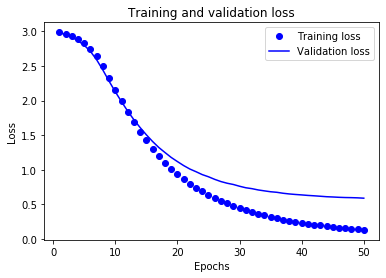

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
import pickle

model_name = file_path + 'tf2-newsgroup-model.h5'

print("save model")
model.save(model_name)

print("save tokenizer")
tokenizer_path = file_path + 'tokenizer.pickle'
with open(tokenizer_path, 'wb') as handle:
    pickle.dump(tokenizer, handle)
    


save model
save tokenizer


In [32]:
results = model.evaluate(test_sequences, test_data["classindex"].values, verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

 - 0s - loss: 0.8907 - acc: 0.7495
loss: 0.891
acc: 0.749
